In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv("C:\\Users\\Amshu\\Downloads\\Practicum 2\\Denver\\crime.csv")

In [3]:
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [4]:
df1=df.drop(['INCIDENT_ID','OFFENSE_ID','OFFENSE_CODE','OFFENSE_CODE_EXTENSION', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X', 'GEO_Y','OFFENSE_TYPE_ID', 'IS_TRAFFIC'], axis=1)

In [5]:
df1=df1.query("IS_CRIME==1")
df1 = df1.reset_index(drop=True)
df1.head()

,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME
0,all-other-crimes,6/15/2016 11:31:00 PM,-104.809881,39.773188,5,521,montbello,1
1,larceny,10/11/2017 12:30:00 PM,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1
2,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,-104.957381,39.663490,3,314,wellshire,1
3,larceny,1/30/2018 7:20:00 PM,-104.941440,39.702698,3,312,belcaro,1
4,larceny,6/22/2017 8:53:00 PM,-104.955370,39.717107,3,311,cherry-creek,1


In [6]:
print(df1.count)

<bound method DataFrame.count of                  OFFENSE_CATEGORY_ID   FIRST_OCCURRENCE_DATE     GEO_LON  \
0                   all-other-crimes   6/15/2016 11:31:00 PM -104.809881   
1                            larceny  10/11/2017 12:30:00 PM -104.781434   
2           theft-from-motor-vehicle     3/4/2016 8:00:00 PM -104.957381   
3                            larceny    1/30/2018 7:20:00 PM -104.941440   
4                            larceny    6/22/2017 8:53:00 PM -104.955370   
5                   all-other-crimes   1/31/2018 12:44:00 AM -104.961928   
6           theft-from-motor-vehicle    6/1/2017 12:15:00 PM -105.025543   
7                   all-other-crimes    1/30/2018 7:40:00 AM -104.983794   
8           theft-from-motor-vehicle   1/31/2018 12:55:00 AM -105.015451   
9                       drug-alcohol    1/30/2018 8:04:00 PM -104.925197   
10          theft-from-motor-vehicle    1/28/2018 5:25:00 AM -104.997720   
11                           larceny    5/31/2016 4:54:

In [7]:
df1.isna().sum()

OFFENSE_CATEGORY_ID         0
FIRST_OCCURRENCE_DATE       0
GEO_LON                  4395
GEO_LAT                  4395
DISTRICT_ID                 0
PRECINCT_ID                 0
NEIGHBORHOOD_ID             0
IS_CRIME                    0
dtype: int64

In [8]:
df1['FIRST_OCCURRENCE_DATE']=pd.to_datetime(df1['FIRST_OCCURRENCE_DATE'])
df1['YEAR']=df1['FIRST_OCCURRENCE_DATE'].dt.year
df1['MONTH']=df1['FIRST_OCCURRENCE_DATE'].dt.month
df1['DAY']=df1['FIRST_OCCURRENCE_DATE'].dt.day
df1['DAY_OF_WEEK']=df1['FIRST_OCCURRENCE_DATE'].dt.strftime('%A')
df1['SQLDATE']=df1['FIRST_OCCURRENCE_DATE'].dt.strftime('%Y%m%d')
df1['HOUR']=df1['FIRST_OCCURRENCE_DATE'].dt.hour

In [9]:
df1.head()
print(df1.dtypes)

OFFENSE_CATEGORY_ID              object
FIRST_OCCURRENCE_DATE    datetime64[ns]
GEO_LON                         float64
GEO_LAT                         float64
DISTRICT_ID                       int64
PRECINCT_ID                       int64
NEIGHBORHOOD_ID                  object
IS_CRIME                          int64
YEAR                              int64
MONTH                             int64
DAY                               int64
DAY_OF_WEEK                      object
SQLDATE                          object
HOUR                              int64
dtype: object


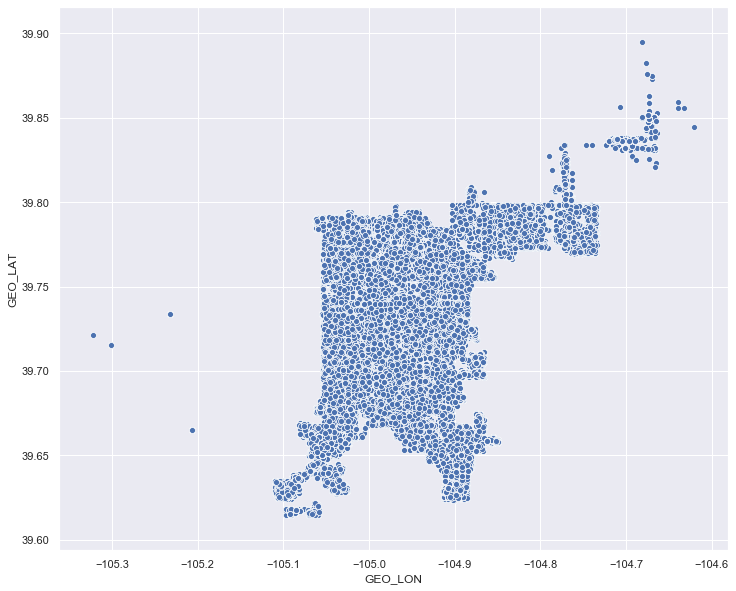

In [10]:
#Removing outliers
df1=df1[(df1['GEO_LON']<-50) & (df1['GEO_LAT']>38) & (df1['GEO_LAT']>-105)]
plt.figure(figsize=(12,10))
ax=sns.scatterplot(x='GEO_LON', y='GEO_LAT', data=df1)

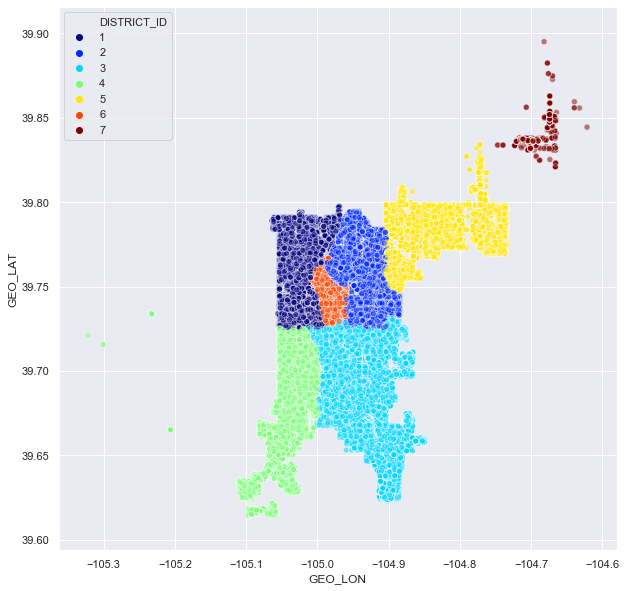

In [11]:
## Districts ##
plt.figure(figsize=(10,10))
sns.scatterplot(x='GEO_LON', y='GEO_LAT',
               alpha=0.5, hue='DISTRICT_ID',
               palette=plt.get_cmap('jet'), legend='full',
               data=df1
               )


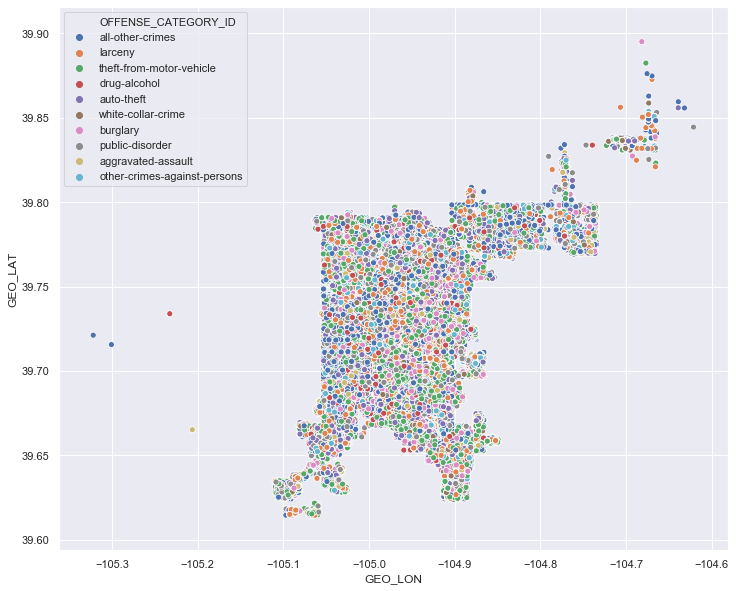

In [12]:
#types of offenses 
offense=df1['OFFENSE_CATEGORY_ID'].value_counts()[:10].index

plt.figure(figsize=(12,10))
sns.scatterplot(x='GEO_LON', y='GEO_LAT',
               hue='OFFENSE_CATEGORY_ID',
               data=df1[df1['OFFENSE_CATEGORY_ID'].isin(offense)])

In [13]:
df1.dtypes

OFFENSE_CATEGORY_ID              object
FIRST_OCCURRENCE_DATE    datetime64[ns]
GEO_LON                         float64
GEO_LAT                         float64
DISTRICT_ID                       int64
PRECINCT_ID                       int64
NEIGHBORHOOD_ID                  object
IS_CRIME                          int64
YEAR                              int64
MONTH                             int64
DAY                               int64
DAY_OF_WEEK                      object
SQLDATE                          object
HOUR                              int64
dtype: object

In [14]:
df1['DISTRICT_ID']=df1.DISTRICT_ID.astype('object')
df1['PRECINCT_ID']=df1.PRECINCT_ID.astype('object')
df1.dtypes

OFFENSE_CATEGORY_ID              object
FIRST_OCCURRENCE_DATE    datetime64[ns]
GEO_LON                         float64
GEO_LAT                         float64
DISTRICT_ID                      object
PRECINCT_ID                      object
NEIGHBORHOOD_ID                  object
IS_CRIME                          int64
YEAR                              int64
MONTH                             int64
DAY                               int64
DAY_OF_WEEK                      object
SQLDATE                          object
HOUR                              int64
dtype: object

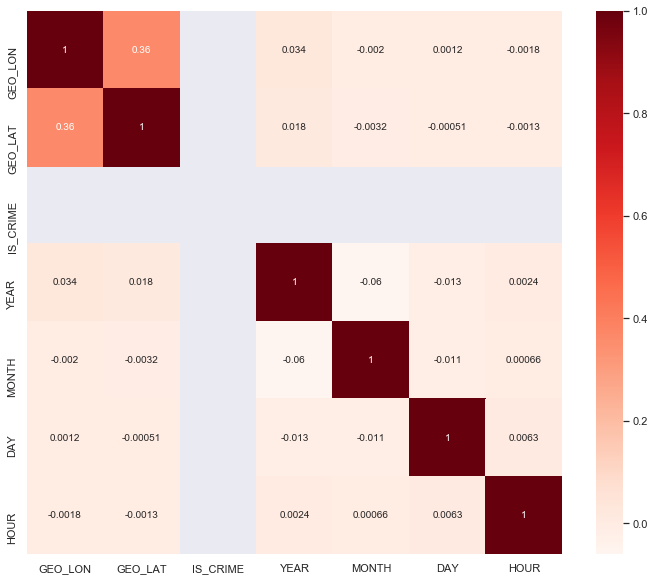

In [15]:
plt.figure(figsize=(12,10))
cor=df1.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [16]:
df2=df1.drop(['FIRST_OCCURRENCE_DATE', 'IS_CRIME', 'DISTRICT_ID','PRECINCT_ID'], axis=1)
df2.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\crime_db.csv',index=False)
df2.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,YEAR,MONTH,DAY,DAY_OF_WEEK,SQLDATE,HOUR
0,all-other-crimes,-104.809881,39.773188,montbello,2016,6,15,Wednesday,20160615,23
1,larceny,-104.781434,39.785649,gateway-green-valley-ranch,2017,10,11,Wednesday,20171011,12
2,theft-from-motor-vehicle,-104.957381,39.663490,wellshire,2016,3,4,Friday,20160304,20
3,larceny,-104.941440,39.702698,belcaro,2018,1,30,Tuesday,20180130,19
4,larceny,-104.955370,39.717107,cherry-creek,2017,6,22,Thursday,20170622,20


In [17]:
df11=pd.read_csv('C:\\Users\\Amshu\\Downloads\\Practicum 2\\Denver\\GdeltDenver.csv')
df11.columns

C:\Users\Amshu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (14,24,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'EventBaseCode', 'EventRootCode', 'QuadClass',
       'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone',
       'Actor1Geo_Type', 'Actor1Geo_FullName', 'Actor1Geo_CountryCode',
       'Actor1Geo_ADM1Code', 'Actor1Geo_Lat', 'Actor1Geo_Long',
       'Actor1Geo_FeatureID', 'Actor2Geo_Type', 'Actor2Geo_FullName',
       'Actor2Geo_CountryCode', 'Actor2Geo_ADM1Code', 'Actor2Geo_Lat',
       'Actor2Geo_Long', 'Actor2Geo_FeatureID', 'Action

In [18]:
df11=df11[['SQLDATE','NumArticles','AvgTone']]
print(df11)

          SQLDATE  NumArticles    AvgTone
0        20140320           13   3.796506
1        20140320           10   1.677852
2        20140320            8   1.058201
3        20140320            1   1.058201
4        20140320            5   2.402957
5        20140320           10   1.830443
6        20140320            6   0.942763
7        20140320            2   1.107011
8        20140320           10   1.873330
9        20140320            2   1.107011
10       20140320            3   1.597444
11       20140320           12   2.497096
12       20140320           10   2.931596
13       20140320            5   4.582210
14       20140320            2   4.713115
15       20140320            6   7.093185
16       20140320            6   2.931596
17       20140320            1   2.196382
18       20140320            1   2.196382
19       20140320            5   2.155172
20       20140320            1   3.664921
21       20140320            1   3.664921
22       20140320            4   3

In [19]:
df11['Tone']=df11.NumArticles*df11.AvgTone
df11=df11[['SQLDATE','Tone']]
df11.head()

,SQLDATE,Tone
0,20140320,49.354579
1,20140320,16.778523
2,20140320,8.465608
3,20140320,1.058201
4,20140320,12.014787


In [20]:
df11=df11.groupby('SQLDATE')['Tone'].mean()

print(df11)

SQLDATE
20140320     18.307818
20140321     22.164410
20140322     18.617043
20140323     35.089788
20140324     29.667215
20140325     32.233382
20140326     27.153260
20140327     24.572015
20140328     19.269738
20140329     40.299589
20140330     20.840384
20140331     22.212658
20140401     28.176600
20140402     31.131557
20140403     10.315910
20140404    -18.511549
20140405     28.461108
20140406     23.322162
20140407     20.297949
20140408     18.667865
20140409     18.421640
20140410     22.661979
20140411     17.552433
20140412     18.617701
20140413     13.031689
20140414     16.985528
20140415     19.652847
20140416     19.953972
20140417     30.263119
20140418     24.781849
               ...    
20191017     -8.777951
20191018    -33.300305
20191019     -9.137644
20191020     -7.579954
20191021    -26.157371
20191022   -111.936198
20191023    -50.068310
20191024    -83.498892
20191025     -5.754197
20191026     -6.704239
20191027     -3.150458
20191028    -27.390580
201

In [21]:
df2['SQLDATE']=df2['SQLDATE'].astype('int')
df2.dtypes

OFFENSE_CATEGORY_ID     object
GEO_LON                float64
GEO_LAT                float64
NEIGHBORHOOD_ID         object
YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK             object
SQLDATE                  int32
HOUR                     int64
dtype: object

In [22]:
df3=pd.merge(df2,df11,on=["SQLDATE"])
df3.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,YEAR,MONTH,DAY,DAY_OF_WEEK,SQLDATE,HOUR,Tone
0,all-other-crimes,-104.809881,39.773188,montbello,2016,6,15,Wednesday,20160615,23,-39.460509
1,public-disorder,-104.882831,39.642326,hampden-south,2016,6,15,Wednesday,20160615,0,-39.460509
2,public-disorder,-104.959103,39.658501,wellshire,2016,6,15,Wednesday,20160615,8,-39.460509
3,larceny,-105.004623,39.754804,union-station,2016,6,15,Wednesday,20160615,12,-39.460509
4,auto-theft,-105.024826,39.765173,highland,2016,6,15,Wednesday,20160615,17,-39.460509


In [23]:
df3.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\integrated.csv',index=False)

In [24]:
df3=df3.drop(['SQLDATE', 'GEO_LON','GEO_LAT'], axis=1)
df3.head()

,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,Tone
0,all-other-crimes,montbello,2016,6,15,Wednesday,23,-39.460509
1,public-disorder,hampden-south,2016,6,15,Wednesday,0,-39.460509
2,public-disorder,wellshire,2016,6,15,Wednesday,8,-39.460509
3,larceny,union-station,2016,6,15,Wednesday,12,-39.460509
4,auto-theft,highland,2016,6,15,Wednesday,17,-39.460509


In [25]:
print(df3['OFFENSE_CATEGORY_ID'].unique())

['all-other-crimes' 'public-disorder' 'larceny' 'auto-theft'
 'other-crimes-against-persons' 'theft-from-motor-vehicle' 'drug-alcohol'
 'burglary' 'aggravated-assault' 'white-collar-crime' 'robbery' 'murder'
 'arson']


In [26]:
df3['OFFENSE_CATEGORY_ID']=df3['OFFENSE_CATEGORY_ID'].replace(['all-other-crimes'],'other-crimes')
df3['OFFENSE_CATEGORY_ID']=df3['OFFENSE_CATEGORY_ID'].replace(['other-crimes-against-persons'],'other-crimes')
df3['OFFENSE_CATEGORY_ID']=df3['OFFENSE_CATEGORY_ID'].replace(['auto-theft'],'vehicle-related-theft')
df3['OFFENSE_CATEGORY_ID']=df3['OFFENSE_CATEGORY_ID'].replace(['theft-from-motor-vehicle'],'vehicle-related-theft')
df3['OFFENSE_CATEGORY_ID']=df3['OFFENSE_CATEGORY_ID'].replace(['larceny'],'theft')
df3['OFFENSE_CATEGORY_ID']=df3['OFFENSE_CATEGORY_ID'].replace(['burglary'],'theft')
df3['OFFENSE_CATEGORY_ID']=df3['OFFENSE_CATEGORY_ID'].replace(['robbery'],'theft')
df3['OFFENSE_CATEGORY_ID']=df3['OFFENSE_CATEGORY_ID'].replace(['aggravated-assault'],'dangerous-crimes')
df3['OFFENSE_CATEGORY_ID']=df3['OFFENSE_CATEGORY_ID'].replace(['murder'],'dangerous-crimes')
df3['OFFENSE_CATEGORY_ID']=df3['OFFENSE_CATEGORY_ID'].replace(['arson'],'dangerous-crimes')
df3.head()

,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,Tone
0,other-crimes,montbello,2016,6,15,Wednesday,23,-39.460509
1,public-disorder,hampden-south,2016,6,15,Wednesday,0,-39.460509
2,public-disorder,wellshire,2016,6,15,Wednesday,8,-39.460509
3,theft,union-station,2016,6,15,Wednesday,12,-39.460509
4,vehicle-related-theft,highland,2016,6,15,Wednesday,17,-39.460509


In [27]:
print(df3['OFFENSE_CATEGORY_ID'].unique())
df3.groupby('OFFENSE_CATEGORY_ID').count()


['other-crimes' 'public-disorder' 'theft' 'vehicle-related-theft'
 'drug-alcohol' 'dangerous-crimes' 'white-collar-crime']


,NEIGHBORHOOD_ID,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,Tone
OFFENSE_CATEGORY_ID,,,,,,,
dangerous-crimes,13251,13251,13251,13251,13251,13251,13251
drug-alcohol,33428,33428,33428,33428,33428,33428,33428
other-crimes,117549,117549,117549,117549,117549,117549,117549
public-disorder,52989,52989,52989,52989,52989,52989,52989
theft,83903,83903,83903,83903,83903,83903,83903
vehicle-related-theft,66968,66968,66968,66968,66968,66968,66968
white-collar-crime,7043,7043,7043,7043,7043,7043,7043


In [29]:

df3.head()

,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,Tone
0,other-crimes,montbello,2016,6,15,Wednesday,23,-39.460509
1,public-disorder,hampden-south,2016,6,15,Wednesday,0,-39.460509
2,public-disorder,wellshire,2016,6,15,Wednesday,8,-39.460509
3,theft,union-station,2016,6,15,Wednesday,12,-39.460509
4,vehicle-related-theft,highland,2016,6,15,Wednesday,17,-39.460509


In [29]:
df4=df3

In [30]:
df4.loc[(df4['HOUR'] >= 0) & (df4['HOUR'] < 4), 'Hr_range'] = "T1"
df4.loc[(df4['HOUR'] >= 4) & (df4['HOUR'] < 8), 'Hr_range'] = "T2"
df4.loc[(df4['HOUR'] >= 8) & (df4['HOUR'] < 12), 'Hr_range'] = "T3"
df4.loc[(df4['HOUR'] >= 12) & (df4['HOUR'] < 16), 'Hr_range'] = "T4"
df4.loc[(df4['HOUR'] >= 16) & (df4['HOUR'] < 20), 'Hr_range'] = "T5"
df4.loc[(df4['HOUR'] >= 20), 'Hr_range'] = "T6"
df4.head()

,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,Tone,Hr_range
0,other-crimes,montbello,2016,6,15,Wednesday,23,-39.460509,T6
1,public-disorder,hampden-south,2016,6,15,Wednesday,0,-39.460509,T1
2,public-disorder,wellshire,2016,6,15,Wednesday,8,-39.460509,T3
3,theft,union-station,2016,6,15,Wednesday,12,-39.460509,T4
4,vehicle-related-theft,highland,2016,6,15,Wednesday,17,-39.460509,T5


In [31]:
df4.describe()

,YEAR,MONTH,DAY,HOUR,Tone
count,375131.000000,375131.000000,375131.000000,375131.000000,375131.000000
mean,2016.561233,6.568412,15.672810,13.199442,-33.003482
std,1.631690,3.262339,8.853271,6.881284,65.801980
min,2014.000000,1.000000,1.000000,0.000000,-1580.672249
25%,2015.000000,4.000000,8.000000,8.000000,-40.538298
50%,2017.000000,7.000000,16.000000,14.000000,-23.302376
75%,2018.000000,9.000000,23.000000,19.000000,-11.969384
max,2019.000000,12.000000,31.000000,23.000000,42.840774


In [32]:
df4.loc[(df4['Tone'] < -60), 'Tone_range'] = "Extremely_Negative"
df4.loc[(df4['Tone'] >= -60) & (df4['Tone'] < -40), 'Tone_range'] = "Highly_Negative"
df4.loc[(df4['Tone'] >= -40) & (df4['Tone'] < -20), 'Tone_range'] = "Negative"
df4.loc[(df4['Tone'] >= -20) & (df4['Tone'] < 0), 'Tone_range'] = "Slightly_Negative"
df4.loc[(df4['Tone'] >= 0) & (df4['Tone'] < 20), 'Tone_range'] = "Slightly_Positive"
df4.loc[(df4['Tone'] >= 20), 'Tone_range'] = "Positive"
print(df4)      

          OFFENSE_CATEGORY_ID             NEIGHBORHOOD_ID  YEAR  MONTH  DAY  \
0                other-crimes                   montbello  2016      6   15   
1             public-disorder               hampden-south  2016      6   15   
2             public-disorder                   wellshire  2016      6   15   
3                       theft               union-station  2016      6   15   
4       vehicle-related-theft                    highland  2016      6   15   
5                       theft                 athmar-park  2016      6   15   
6                other-crimes                      barnum  2016      6   15   
7                other-crimes                   stapleton  2016      6   15   
8       vehicle-related-theft                 bear-valley  2016      6   15   
9                       theft                         cbd  2016      6   15   
10               other-crimes                         cbd  2016      6   15   
11            public-disorder                   mont

In [33]:
df4=df4.drop(['YEAR', 'MONTH','DAY','HOUR','Tone','OFFENSE_CATEGORY_ID'], axis=1)
df4.head()

,NEIGHBORHOOD_ID,DAY_OF_WEEK,Hr_range,Tone_range
0,montbello,Wednesday,T6,Negative
1,hampden-south,Wednesday,T1,Negative
2,wellshire,Wednesday,T3,Negative
3,union-station,Wednesday,T4,Negative
4,highland,Wednesday,T5,Negative


In [34]:
rec=[]
for i in range (0,375131):
    rec.append([str(df4.values[i,j]) for j in range(0,4)])


In [35]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

te = TransactionEncoder()
te_ary = te.fit(rec).transform(rec)
df5 = pd.DataFrame(te_ary, columns=te.columns_)
df5.head()

,Extremely_Negative,Friday,Highly_Negative,Monday,Negative,Positive,Saturday,Slightly_Negative,Slightly_Positive,Sunday,...,virginia-village,washington-park,washington-park-west,washington-virginia-vale,wellshire,west-colfax,west-highland,westwood,whittier,windsor
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
frequent_itemsets=fpgrowth(df5, min_support=0.0005, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
freq=frequent_itemsets[ (frequent_itemsets['length'] >= 4) ]

In [40]:
freq.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\fpgrowth.csv',index=False)

In [39]:
print(freq)

       support                                         itemsets  length
172   0.000536               (Tuesday, montbello, T4, Negative)       4
344   0.000525            (T1, Sunday, Negative, union-station)       4
345   0.000765   (T1, Sunday, Slightly_Negative, union-station)       4
353   0.000650          (T1, Saturday, Negative, union-station)       4
531   0.000549             (T5, stapleton, Wednesday, Negative)       4
554   0.000536                (Friday, stapleton, T4, Negative)       4
555   0.000666                (Friday, T5, stapleton, Negative)       4
577   0.000610              (stapleton, T5, Thursday, Negative)       4
578   0.000626              (stapleton, Thursday, T4, Negative)       4
718   0.000504                   (cbd, T4, Wednesday, Negative)       4
731   0.000608                      (Friday, cbd, T5, Negative)       4
756   0.000501                    (cbd, Thursday, T4, Negative)       4
757   0.000594                    (cbd, T5, Thursday, Negative) 

In [28]:
#DUMMY VARIABLES
dummy_neigh=pd.get_dummies(df3['NEIGHBORHOOD_ID'])
dummy_neigh.head()

,athmar-park,auraria,baker,barnum,barnum-west,bear-valley,belcaro,berkeley,capitol-hill,cbd,...,virginia-village,washington-park,washington-park-west,washington-virginia-vale,wellshire,west-colfax,west-highland,westwood,whittier,windsor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df31=pd.concat([df3,dummy_neigh],axis=1)
df31.head()

,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,Tone,athmar-park,auraria,...,virginia-village,washington-park,washington-park-west,washington-virginia-vale,wellshire,west-colfax,west-highland,westwood,whittier,windsor
0,other-crimes,montbello,2016,6,15,Wednesday,23,-39.460509,0,0,...,0,0,0,0,0,0,0,0,0,0
1,public-disorder,hampden-south,2016,6,15,Wednesday,0,-39.460509,0,0,...,0,0,0,0,0,0,0,0,0,0
2,public-disorder,wellshire,2016,6,15,Wednesday,8,-39.460509,0,0,...,0,0,0,0,1,0,0,0,0,0
3,theft,union-station,2016,6,15,Wednesday,12,-39.460509,0,0,...,0,0,0,0,0,0,0,0,0,0
4,vehicle-related-theft,highland,2016,6,15,Wednesday,17,-39.460509,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df31=df31.drop(['NEIGHBORHOOD_ID','DAY_OF_WEEK'], axis=1)

In [31]:
import scipy
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
Y=df31['OFFENSE_CATEGORY_ID']
X=df31.drop('OFFENSE_CATEGORY_ID',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)


In [33]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [34]:
logmodel=LogisticRegression(solver='lbfgs')
logmodel.fit(X_train,y_train)
pred=logmodel.predict(X_test)

C:\Users\Amshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [35]:
logmodel.score(X_test,y_test)

0.34552104325943933

In [36]:
a1=classification_report(y_test,pred, output_dict=True)
print(a1)

C:\Users\Amshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{'dangerous-crimes': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3381}, 'drug-alcohol': {'precision': 0.18723404255319148, 'recall': 0.005245588936576061, 'f1-score': 0.010205264988982953, 'support': 8388}, 'other-crimes': {'precision': 0.3564692508445811, 'recall': 0.7613445952877612, 'f1-score': 0.4855834242093784, 'support': 29243}, 'public-disorder': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 13452}, 'theft': {'precision': 0.33240686561341914, 'recall': 0.32540932741419637, 'f1-score': 0.3288708782594013, 'support': 20949}, 'vehicle-related-theft': {'precision': 0.30983653028441843, 'recall': 0.1970316067780315, 'f1-score': 0.24088154269972453, 'support': 16642}, 'white-collar-crime': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1728}, 'accuracy': 0.34552104325943933, 'macro avg': {'precision': 0.16942095561365858, 'recall': 0.1841473026309379, 'f1-score': 0.15222015859392674, 'support': 93783}, 'weighted avg': {'precision': 0.2

In [50]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,Y,test_size=0.25)
scaler.fit(X_train1)
X_train1= scaler.transform(X_train1)
X_test1= scaler.transform(X_test1)

In [51]:
clf= DecisionTreeClassifier()
clf=clf.fit(X_train1,y_train1)
pred1=clf.predict(X_test1)

In [52]:
print(metrics.accuracy_score(y_test1,pred1))

0.2918119488606677


In [103]:
a2=classification_report(y_test1,pred1, output_dict=True)
print(a2)

{'dangerous-crimes': {'precision': 0.06908890723919625, 'recall': 0.07576214910956837, 'f1-score': 0.0722718111143104, 'support': 3313}, 'drug-alcohol': {'precision': 0.2397811725846408, 'recall': 0.2795427196149218, 'f1-score': 0.2581397933103678, 'support': 8310}, 'other-crimes': {'precision': 0.38686666029744277, 'recall': 0.4139717157948543, 'f1-score': 0.3999604912257598, 'support': 29345}, 'public-disorder': {'precision': 0.19534231637978036, 'recall': 0.18773860318886143, 'f1-score': 0.19146499732804032, 'support': 13359}, 'theft': {'precision': 0.30270577888147343, 'recall': 0.28048897411313517, 'f1-score': 0.2911742018960412, 'support': 20860}, 'vehicle-related-theft': {'precision': 0.27337895079830565, 'recall': 0.24946479543292102, 'f1-score': 0.26087497279313454, 'support': 16816}, 'white-collar-crime': {'precision': 0.05878552971576227, 'recall': 0.05112359550561798, 'f1-score': 0.05468750000000001, 'support': 1780}, 'accuracy': 0.2918119488606677, 'macro avg': {'precision

In [37]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X,Y,test_size=0.25)
scaler.fit(X_train2)

X_train2= scaler.transform(X_train2)
X_test2= scaler.transform(X_test2)

In [38]:
clf1=RandomForestClassifier(n_estimators=150)


clf1.fit(X_train2,y_train2)

pred2=clf1.predict(X_test2)

In [39]:
print(metrics.accuracy_score(y_test2,pred2))

0.3401895865988505


In [40]:
a3=classification_report(y_test2,pred2, output_dict=True)
print(a3)

{'dangerous-crimes': {'precision': 0.10163468372423597, 'recall': 0.04417670682730924, 'f1-score': 0.06158484065460809, 'support': 3237}, 'drug-alcohol': {'precision': 0.3136588380716934, 'recall': 0.24469623915139826, 'f1-score': 0.2749187432286024, 'support': 8296}, 'other-crimes': {'precision': 0.39494499738082767, 'recall': 0.5155213675213676, 'f1-score': 0.4472489989618864, 'support': 29250}, 'public-disorder': {'precision': 0.23979431209990554, 'recall': 0.1705860395670026, 'f1-score': 0.1993543884138894, 'support': 13395}, 'theft': {'precision': 0.33854119765871227, 'recall': 0.35876514934631165, 'f1-score': 0.34835989621942176, 'support': 20958}, 'vehicle-related-theft': {'precision': 0.312340925406252, 'recall': 0.28449147001129405, 'f1-score': 0.2977664406146954, 'support': 16823}, 'white-collar-crime': {'precision': 0.09365558912386707, 'recall': 0.03399122807017544, 'f1-score': 0.0498793242156074, 'support': 1824}, 'accuracy': 0.3401895865988505, 'macro avg': {'precision': 

In [42]:
a6=confusion_matrix(y_test2,pred2,labels=["dangerous-crimes","drug-alcohol","other-crimes", "public-disorder", "theft","vehicle-related-theft","white-collar-crime"])
a6

array([[  143,   153,  1444,   302,   663,   520,    12],
       [   82,  2030,  3347,   530,  1430,   790,    87],
       [  460,  1948, 15079,  3259,  4994,  3354,   156],
       [  218,   602,  5572,  2285,  2621,  2043,    54],
       [  284,  1023,  6819,  1636,  7519,  3513,   164],
       [  205,   606,  5388,  1391,  4320,  4786,   127],
       [   15,   110,   531,   126,   663,   317,    62]], dtype=int64)

In [59]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X,Y,test_size=0.25)
scaler.fit(X_train3)
X_train3= scaler.transform(X_train3)
X_test3= scaler.transform(X_test3)

In [60]:
clf21=svm.SVC(kernel='poly', C=200,max_iter=500)
clf21.fit(X_train3,y_train3)
pred31=clf21.predict(X_test3)
print(metrics.accuracy_score(y_test3,pred31))

C:\Users\Amshu\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.18681424138703176


In [105]:
a4=classification_report(y_test3,pred31, output_dict=True)
print(a4)

{'dangerous-crimes': {'precision': 0.04411764705882353, 'recall': 0.0009296560272699101, 'f1-score': 0.0018209408194233686, 'support': 3227}, 'drug-alcohol': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8289}, 'other-crimes': {'precision': 0.3343782654127482, 'recall': 0.05450705184983307, 'f1-score': 0.09373443861858871, 'support': 29354}, 'public-disorder': {'precision': 0.16666666666666666, 'recall': 0.00045184125310640863, 'f1-score': 0.00090123920390537, 'support': 13279}, 'theft': {'precision': 0.22424242424242424, 'recall': 0.0017650145494442588, 'f1-score': 0.0035024611889435823, 'support': 20963}, 'vehicle-related-theft': {'precision': 0.17985390845990434, 'recall': 0.9349790350203744, 'f1-score': 0.3016768292682927, 'support': 16933}, 'white-collar-crime': {'precision': 0.0611353711790393, 'recall': 0.024165707710011506, 'f1-score': 0.034639175257731955, 'support': 1738}, 'accuracy': 0.18681424138703176, 'macro avg': {'precision': 0.1443420404313723, 'recall'

In [ ]:
X_train6,X_test6,y_train6,y_test6=train_test_split(X,Y,test_size=0.25)
scaler.fit(X_train6)
X_train6= scaler.transform(X_train6)
X_test6= scaler.transform(X_test6)

In [ ]:
mlp= MLPClassifier(hidden_layer_sizes=(100,100,100), activation='relu', solver='adam', max_iter=50)
mlp.fit(X_train6,y_train6)
pred6=mlp.predict(X_test6)
print(metrics.accuracy_score(y_test6,pred6))

In [ ]:
a5=classification_report(y_test6,pred6, output_dict=True)
print(a5)

In [ ]:
a7=confusion_matrix(y_test6,pred6,labels=["dangerous-crimes","drug-alcohol","other-crimes", "public-disorder", "theft","vehicle-related-theft","white-collar-crime"])
a7

In [66]:
df32=df31[df31['OFFENSE_CATEGORY_ID'] != 'other-crimes' ]
df32.head()

,OFFENSE_CATEGORY_ID,YEAR,MONTH,DAY,HOUR,Tone,athmar-park,auraria,baker,barnum,...,virginia-village,washington-park,washington-park-west,washington-virginia-vale,wellshire,west-colfax,west-highland,westwood,whittier,windsor
1,public-disorder,2016,6,15,0,-39.460509,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,public-disorder,2016,6,15,8,-39.460509,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,theft,2016,6,15,12,-39.460509,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,vehicle-related-theft,2016,6,15,17,-39.460509,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,theft,2016,6,15,18,-39.460509,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df32.shape

(257582, 84)

In [68]:
Y1=df32['OFFENSE_CATEGORY_ID']
X1=df32.drop('OFFENSE_CATEGORY_ID',axis=1)
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,Y1,test_size=0.25)

In [69]:
scaler = StandardScaler()
scaler.fit(X1_train)

X1_train= scaler.transform(X1_train)
X1_test= scaler.transform(X1_test)

In [70]:
logmodel1=LogisticRegression(solver='lbfgs')
logmodel1.fit(X1_train,y1_train)
predict=logmodel1.predict(X1_test)
print(metrics.accuracy_score(y1_test,predict))


C:\Users\Amshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.36306602894589723


C:\Users\Amshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                       precision    recall  f1-score   support

     dangerous-crimes       0.00      0.00      0.00      3375
         drug-alcohol       0.33      0.26      0.29      8455
      public-disorder       0.30      0.09      0.13     13133
                theft       0.39      0.62      0.48     21037
vehicle-related-theft       0.34      0.43      0.38     16559
   white-collar-crime       0.00      0.00      0.00      1837

             accuracy                           0.36     64396
            macro avg       0.23      0.23      0.21     64396
         weighted avg       0.32      0.36      0.32     64396



In [100]:
b1=classification_report(y1_test,predict, output_dict=True)
print(b1)

{'dangerous-crimes': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3375}, 'drug-alcohol': {'precision': 0.33257850241545894, 'recall': 0.2605558840922531, 'f1-score': 0.29219444260229455, 'support': 8455}, 'public-disorder': {'precision': 0.3005070723245263, 'recall': 0.08573821670600777, 'f1-score': 0.1334123222748815, 'support': 13133}, 'theft': {'precision': 0.38819894408447325, 'recall': 0.6151542520321338, 'f1-score': 0.4760083129494418, 'support': 21037}, 'vehicle-related-theft': {'precision': 0.34366088259461547, 'recall': 0.42937375445377135, 'f1-score': 0.38176546391752575, 'support': 16559}, 'white-collar-crime': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1837}, 'accuracy': 0.36306602894589723, 'macro avg': {'precision': 0.22749090023651233, 'recall': 0.231803684547361, 'f1-score': 0.21389675695735724, 'support': 64396}, 'weighted avg': {'precision': 0.3201399521763776, 'recall': 0.36306602894589723, 'f1-score': 0.3192441958687828, 'support'

In [71]:
X1_train1,X1_test1,y1_train1,y1_test1=train_test_split(X1,Y1,test_size=0.25)
scaler.fit(X1_train1)

X1_train1= scaler.transform(X1_train1)
X1_test1= scaler.transform(X1_test1)

In [72]:
dtc= DecisionTreeClassifier()
dtc=dtc.fit(X1_train1,y1_train1)
predict1=dtc.predict(X1_test1)
print(metrics.accuracy_score(y1_test1,predict1))


0.32506677433380954
                       precision    recall  f1-score   support

     dangerous-crimes       0.09      0.10      0.10      3254
         drug-alcohol       0.34      0.36      0.35      8352
      public-disorder       0.29      0.30      0.30     13290
                theft       0.39      0.38      0.39     21070
vehicle-related-theft       0.33      0.33      0.33     16697
   white-collar-crime       0.08      0.07      0.07      1733

             accuracy                           0.33     64396
            macro avg       0.25      0.26      0.26     64396
         weighted avg       0.33      0.33      0.33     64396



In [101]:
b2=classification_report(y1_test1,predict1, output_dict=True)
print(b2)

{'dangerous-crimes': {'precision': 0.09387029908202546, 'recall': 0.09741856177012907, 'f1-score': 0.09561152164077817, 'support': 3254}, 'drug-alcohol': {'precision': 0.3355410866636731, 'recall': 0.35787835249042144, 'f1-score': 0.3463499420625724, 'support': 8352}, 'public-disorder': {'precision': 0.29427713050487286, 'recall': 0.3021820917983446, 'f1-score': 0.29817722834762594, 'support': 13290}, 'theft': {'precision': 0.3905772866075324, 'recall': 0.38243948742287615, 'f1-score': 0.3864655523848349, 'support': 21070}, 'vehicle-related-theft': {'precision': 0.3330880098129408, 'recall': 0.3252680122177637, 'f1-score': 0.3291315677837707, 'support': 16697}, 'white-collar-crime': {'precision': 0.07984293193717278, 'recall': 0.07039815349105598, 'f1-score': 0.07482367371971788, 'support': 1733}, 'accuracy': 0.32506677433380954, 'macro avg': {'precision': 0.2545327907680362, 'recall': 0.25593077653176516, 'f1-score': 0.25509324765655, 'support': 64396}, 'weighted avg': {'precision': 0

In [73]:
X1_train2,X1_test2,y1_train2,y1_test2=train_test_split(X1,Y1,test_size=0.25)
scaler.fit(X1_train2)

X1_train2= scaler.transform(X1_train2)
X1_test2= scaler.transform(X1_test2)

In [74]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X1_train2,y1_train2)
predict2=rfc.predict(X1_test2)
print(metrics.accuracy_score(y1_test2,predict2))


0.37656065594136284
                       precision    recall  f1-score   support

     dangerous-crimes       0.14      0.05      0.07      3407
         drug-alcohol       0.42      0.36      0.39      8293
      public-disorder       0.34      0.28      0.30     13346
                theft       0.41      0.50      0.45     20868
vehicle-related-theft       0.37      0.40      0.38     16751
   white-collar-crime       0.13      0.04      0.06      1731

             accuracy                           0.38     64396
            macro avg       0.30      0.27      0.28     64396
         weighted avg       0.36      0.38      0.36     64396



In [107]:
b3=classification_report(y1_test2,predict2, output_dict=True)
print(b3)

{'dangerous-crimes': {'precision': 0.13671875, 'recall': 0.05136483710008805, 'f1-score': 0.07467463196074248, 'support': 3407}, 'drug-alcohol': {'precision': 0.4169080126879051, 'recall': 0.36452429760038585, 'f1-score': 0.38896037056098814, 'support': 8293}, 'public-disorder': {'precision': 0.3351945244956772, 'recall': 0.27888505919376594, 'f1-score': 0.3044580777096115, 'support': 13346}, 'theft': {'precision': 0.4081584990852828, 'recall': 0.5024918535556834, 'f1-score': 0.4504392276466419, 'support': 20868}, 'vehicle-related-theft': {'precision': 0.36527268807932745, 'recall': 0.40463255925019403, 'f1-score': 0.38394652618460934, 'support': 16751}, 'white-collar-crime': {'precision': 0.1264591439688716, 'recall': 0.03755054881571346, 'f1-score': 0.05790645879732739, 'support': 1731}, 'accuracy': 0.37656065594136284, 'macro avg': {'precision': 0.298118603052844, 'recall': 0.2732415259193051, 'f1-score': 0.27673088214332014, 'support': 64396}, 'weighted avg': {'precision': 0.361074

In [75]:
X1_train3,X1_test3,y1_train3,y1_test3=train_test_split(X1,Y1,test_size=0.25)
scaler.fit(X1_train3)

X1_train3= scaler.transform(X1_train3)
X1_test3= scaler.transform(X1_test3)

In [76]:
mlp1= MLPClassifier(hidden_layer_sizes=(100,100,100), activation='relu', solver='adam', max_iter=50)
mlp1.fit(X1_train3,y1_train3)
predict3=mlp1.predict(X1_test3)
print(metrics.accuracy_score(y1_test3,predict3))

C:\Users\Amshu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.3831138580036027


In [108]:
b4=classification_report(y1_test3,predict3, output_dict=True)
print(b4)

{'dangerous-crimes': {'precision': 0.19678714859437751, 'recall': 0.014587674903245014, 'f1-score': 0.02716186252771619, 'support': 3359}, 'drug-alcohol': {'precision': 0.38918597742127153, 'recall': 0.317691281678186, 'f1-score': 0.3498230856532479, 'support': 8247}, 'public-disorder': {'precision': 0.3172425194246983, 'recall': 0.14215867842062374, 'f1-score': 0.19633722119909963, 'support': 13499}, 'theft': {'precision': 0.3973994557000302, 'recall': 0.6321916490282855, 'f1-score': 0.48802406327750747, 'support': 20788}, 'vehicle-related-theft': {'precision': 0.37968031530545215, 'recall': 0.4136450381679389, 'f1-score': 0.3959356090877954, 'support': 16768}, 'white-collar-crime': {'precision': 0.17857142857142858, 'recall': 0.002881844380403458, 'f1-score': 0.005672149744753261, 'support': 1735}, 'accuracy': 0.3831138580036027, 'macro avg': {'precision': 0.3098111408362097, 'recall': 0.2538593610964471, 'f1-score': 0.24382566524835328, 'support': 64396}, 'weighted avg': {'precision

In [78]:
X1_train4,X1_test4,y1_train4,y1_test4=train_test_split(X1,Y1,test_size=0.25)
scaler.fit(X1_train4)

X1_train4= scaler.transform(X1_train4)
X1_test4= scaler.transform(X1_test4)

In [79]:
clf22=svm.SVC(kernel='poly', C=200,max_iter=500)
clf22.fit(X1_train4,y1_train4)
pred41=clf22.predict(X1_test4)
print(metrics.accuracy_score(y1_test4,pred41))

C:\Users\Amshu\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.24967389278837196


In [99]:
b5=classification_report(y1_test4,pred41, output_dict=True)
print(b5)

{'dangerous-crimes': {'precision': 0.06153846153846154, 'recall': 0.001234186979327368, 'f1-score': 0.0024198427102238356, 'support': 3241}, 'drug-alcohol': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8390}, 'public-disorder': {'precision': 0.2338772338772339, 'recall': 0.02252656787906002, 'f1-score': 0.04109495528705031, 'support': 13362}, 'theft': {'precision': 0.29935506986743105, 'recall': 0.07936734112282702, 'f1-score': 0.12546928968313562, 'support': 21054}, 'vehicle-related-theft': {'precision': 0.25861687617502854, 'recall': 0.8459034183396635, 'f1-score': 0.39612653689247745, 'support': 16587}, 'white-collar-crime': {'precision': 0.022145976294447912, 'recall': 0.04029511918274688, 'f1-score': 0.028582930756843806, 'support': 1762}, 'accuracy': 0.24967389278837196, 'macro avg': {'precision': 0.1459222696254338, 'recall': 0.16488777225060414, 'f1-score': 0.0989489258882885, 'support': 64396}, 'weighted avg': {'precision': 0.21671896902367635, 'recall': 0.249

In [111]:
a1=pd.DataFrame(a1)
a2=pd.DataFrame(a2)
a3=pd.DataFrame(a3)
a4=pd.DataFrame(a4)
a5=pd.DataFrame(a5)
b1=pd.DataFrame(b1)
b2=pd.DataFrame(b2)
b3=pd.DataFrame(b3)
b4=pd.DataFrame(b4)
b5=pd.DataFrame(b5)

In [112]:
a1.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\logreg1.csv',index=False)
a2.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\dec1.csv',index=False)
a3.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\rf1.csv',index=False)
a4.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\svm1.csv',index=False)
a5.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\nn1.csv',index=False)
b1.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\logreg2.csv',index=False)
b2.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\dec2.csv',index=False)
b3.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\rf2.csv',index=False)
b4.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\nn2.csv',index=False)
b5.to_csv(r'C:\Users\Amshu\Downloads\Practicum 2\Denver\svm2.csv',index=False)